In [1]:
#logistic regression (type of classification algorithm)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#to load dataset insurance.csv
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
#to check null values 
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

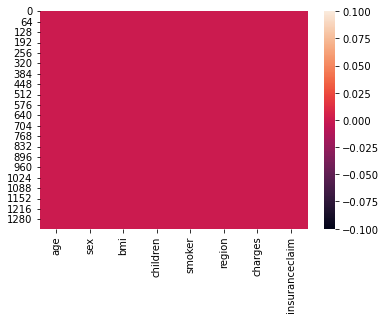

In [4]:
#visualise
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [6]:
df.duplicated().sum()

1

In [7]:
#to extract duplicate row
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [8]:
#to delete duplicate row permanently
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#how many samples of claim and not claim of customer
df["insuranceclaim"].value_counts()

1    782
0    555
Name: insuranceclaim, dtype: int64

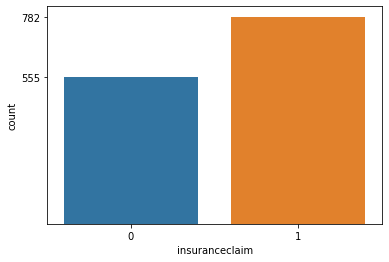

In [11]:
#visualisation
sns.countplot(data=df,x="insuranceclaim")
f=df["insuranceclaim"].value_counts()
plt.yticks(f)
plt.show()

In [12]:
df['region'].value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

In [13]:
#select input output
x=df.drop("insuranceclaim",axis=1)#input
y=df["insuranceclaim"]#input

In [14]:
#split train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
#apply standard scaler on input data x_train and x_test
from sklearn.preprocessing import StandardScaler
#create object of standardscaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [16]:
y_train.value_counts()

1    552
0    383
Name: insuranceclaim, dtype: int64

In [17]:
#create a function
def create_model(model): 
    model.fit(x_train,y_train) #train the model
    y_pred=model.predict(x_test) #test the model
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
# use baseline model LogisticRegression
from sklearn.linear_model import LogisticRegression

In [20]:
# create object of LogisticRegression class
lr=LogisticRegression()

In [21]:
# call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402

[[147  25]
 [ 21 209]]


In [22]:
# Next apply DecisionTreeClassifier class
# perform dataset with the help of DecisionTreeClassifier
# call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [23]:
# create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#means find loss: 1-P**2-Q**2

In [24]:
# call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

[[168   4]
 [  9 221]]


In [25]:
# show the information gain of all the input features
IG=dt.feature_importances_
print('Information Gain :',IG)
# feature_importance_ inbuilt method of DecisionTreeClassifier class

Information Gain : [0.08256787 0.         0.33015759 0.37755021 0.18086023 0.
 0.0288641 ]


In [26]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
dict={'Input':x.columns,'IG':IG}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False) #descending order accordng to IG 

,Input,IG
3,children,0.377550
2,bmi,0.330158
4,smoker,0.180860
0,age,0.082568
6,charges,0.028864
1,sex,0.000000
5,region,0.000000


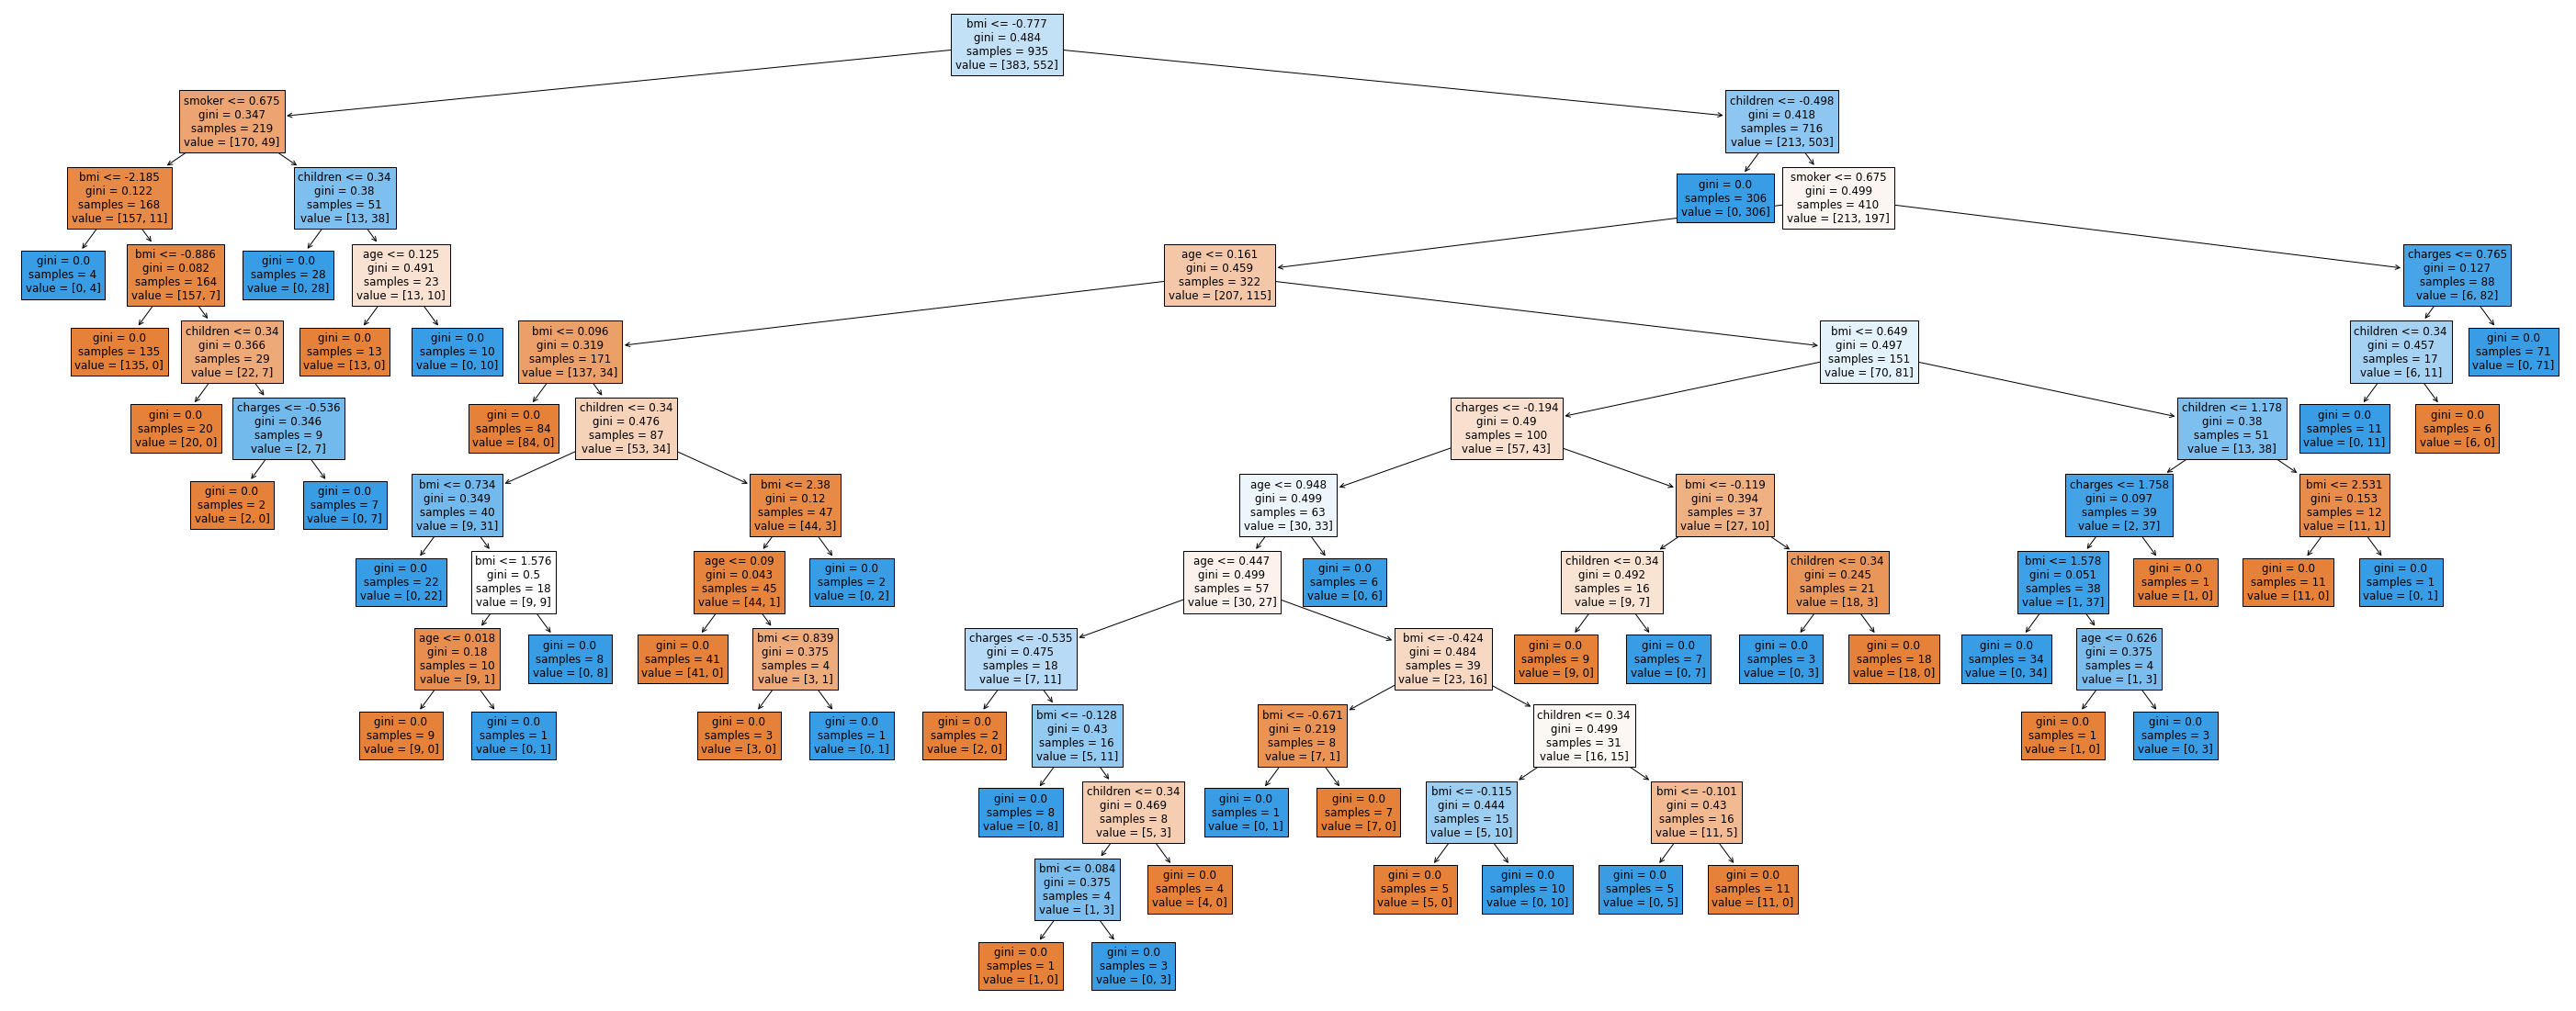

In [28]:
# create the tree
from sklearn import tree
features=x.columns #input features
fig=plt.figure(figsize=(50,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [29]:
# create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy') # calling entropy by default gini index method
#means find loss:  -p*log2(p)-q*log2(Q)   #base of log2

In [30]:
# call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402

[[171   1]
 [  4 226]]


# Ensembling technique :----
# Random forest -tree :-------------------------------------

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
x.columns.size

7

In [33]:
"""for i in range(1,201):
    rfc=RandomForestClassifier(max_features=7,n_estimators=i,random_state=1)
    # call function :-
    print("No_of_Decision_trees :",i)
    rfc=create_model(rfc) """   

'for i in range(1,201):\n    rfc=RandomForestClassifier(max_features=7,n_estimators=i,random_state=1)\n    # call function :-\n    print("No_of_Decision_trees :",i)\n    rfc=create_model(rfc) '

In [34]:
# getting best accuracy when n_estimators=5
"""for i in range(1,8):
    rfc=RandomForestClassifier(max_features=i,n_estimators=i,random_state=1)
    # call function :-
    print("features :",i)
    rfc=create_model(rfc)"""

'for i in range(1,8):\n    rfc=RandomForestClassifier(max_features=i,n_estimators=i,random_state=1)\n    # call function :-\n    print("features :",i)\n    rfc=create_model(rfc)'

In [35]:
rfc=RandomForestClassifier(max_features=7,n_estimators=5,random_state=1)

In [36]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       172
           1       0.99      0.99      0.99       230

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

[[169   3]
 [  3 227]]


In [37]:
IG=rfc.feature_importances_

In [38]:
dict1={"Input":x.columns,"IG":IG}
df10=pd.DataFrame(dict1)

In [39]:
df10.sort_values("IG",ascending=False)

,Input,IG
2,bmi,0.370499
3,children,0.323468
4,smoker,0.170276
6,charges,0.075578
0,age,0.054726
1,sex,0.002728
5,region,0.002725


# -------------RFC----------->recall= 0.99

# ADA Boost :- 

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
"""for i in range(1,100):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no_of decision_stumps:",i)
    # call function :-
    ada=create_model(ada)"""

'for i in range(1,100):\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("no_of decision_stumps:",i)\n    # call function :-\n    ada=create_model(ada)'

In [42]:
ada=AdaBoostClassifier(n_estimators=9,random_state=1)

In [43]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.89      0.78      0.84       172
           1       0.85      0.93      0.89       230

    accuracy                           0.87       402
   macro avg       0.87      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402

[[135  37]
 [ 16 214]]


# ADA Boost -------> recall----->0.93 

# Extreme Grdaient Boost :--

In [44]:
import xgboost

In [45]:
from xgboost import XGBClassifier

In [46]:
"""for i in range(1,101):
    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No of decisiontree:",i)
    # call function :
    xgb=create_model(xgb)"""

'for i in range(1,101):\n    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print("No of decisiontree:",i)\n    # call function :\n    xgb=create_model(xgb)'

In [47]:
xgb=XGBClassifier(n_estimators=9,reg_alpha=1,random_state=1)
# call fucntion :-
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       172
           1       0.97      0.98      0.98       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

[[166   6]
 [  5 225]]


# XGBoost----------->recall------> 0.98

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [50]:
knn=create_model(knn)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       172
           1       0.90      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[149  23]
 [ 21 209]]


# KNN -----------> recall 0.91

# SVM :-----------------

In [51]:
from sklearn.svm import LinearSVC

In [52]:
svc1=LinearSVC(random_state=1)

In [53]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.89      0.92      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402

[[146  26]
 [ 19 211]]


# LinearSvc ----------->recall---------->0.92 

In [54]:
# Adding error at training time means soft margin <=1
svc2=LinearSVC(random_state=1,C=0.9)

In [55]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.89      0.92      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402

[[146  26]
 [ 19 211]]


In [56]:
from sklearn.svm import SVC

In [57]:
svc2=SVC(kernel='poly',random_state=1)

In [58]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.93      0.90      0.91       230

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402

[[156  16]
 [ 24 206]]


# SVM -------> recall -----> 0.92

# Deploying the model by streamlit:-----

In [59]:
import streamlit as st
import pickle

In [60]:
file11=open('scale3.pkl','wb')
file12=open('model3.pkl','wb')

In [61]:
# now dump your object to this file :-
pickle.dump(ss,file11)
pickle.dump(rfc,file12)

In [62]:
# close file
file11.close()
file12.close()

In [63]:
import os

In [64]:
os.getcwd()

'C:\\Users\\ajayk'